<a href="https://colab.research.google.com/github/GentaJuan/Genta-Juan-Alberto/blob/main/EstudioAnestros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cargar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Configuramos el entorno de Python en Google Colab
from google.colab import drive
import os

drive.mount("/content/drive")
print(os.getcwd())

os.chdir("/content/drive/My Drive/")
print(os.getcwd())

#Importamos un dataset sobre inseminaciones con una mayor cantidad de datos. En este se quisiera analizar la relacion del las enfermedades y variables del animal sobre el resultado de las inseminaciones.
df = pd.read_excel('/content/drive/MyDrive/CODERHOUSE/DataScient/Estudio_anestros.xlsx')
df




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive
/content/drive/My Drive


,Establecimiento,Tambo,Id,Fpart,F1ser,Delps,Dabi,Fanes,Vanes,Vins,...,Vmetr,Evento,Del,FechaServicio,Toro,Id_resulto,Resultado,Tecnico,Codigo,Tecnico.1
0,1.0,1,2125,21/03/23,04/10/23,197,197,0,0,3,...,2,INSEMIN,197,04/10/23,NEWTWIST,P,2.0,8,G,Mingo
1,1.0,2,3481,16/05/24,19/07/24,64,64,0,0,1,...,1,INSEMIN,64,19/07/24,WARRANT,P,2.0,7,N,Sergio Acha
2,1.0,1,3496,13/06/23,15/09/23,94,194,0,0,3,...,0,INSEMIN,94,15/09/23,LASSITER,A,2.0,8,N,Mingo
3,1.0,1,3564,05/12/23,22/02/24,79,135,13/02/24,1,2,...,0,INSEMIN,79,22/02/24,MOSTWANT,O,1.0,7,F,Sergio Acha
4,1.0,2,3578,23/07/23,11/10/23,80,117,0,0,2,...,0,INSEMIN,80,11/10/23,STARSKY,O,1.0,7,G,Sergio Acha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,2.0,2,13732,2022-10-11 00:00:00,2023-01-02 00:00:00,83,104,0,0,3,...,0,INSEMIN,83,2023-01-02 00:00:00,WARRANT,O,1.0,25,N,Jonas
2397,2.0,2,13740,2023-01-27 00:00:00,2023-03-23 00:00:00,55,93,0,0,2,...,0,INSEMIN,55,2023-03-23 00:00:00,ZOLA,O,1.0,16,N,Toto
2398,2.0,2,13753,2022-09-22 00:00:00,2023-01-27 00:00:00,127,231,0,0,8,...,1,INSEMIN,127,2023-01-27 00:00:00,PLEDGE,O,1.0,16,N,Toto
2399,2.0,2,13777,2023-09-22 00:00:00,2023-11-16 00:00:00,55,79,0,0,2,...,0,INSEMIN,55,2023-11-16 00:00:00,MGM,O,1.0,16,P,Toto


In [ ]:

# Eliminar la columna "Pcet"
df_cleaned = df.drop(columns=["Pcet"])

# Eliminar la columna "Resultado"
df_cleaned = df_cleaned.drop(columns=["Resultado"])

# Eliminar la columna "Resultado"
df_cleaned = df_cleaned.drop(columns=["Establecimiento"])

# Reemplazar valores en la columna "Id_resulto"
replacement_map = {"A": "Preñada", "P": "Preñada", "O": "Vacía", "R": "Vacía"}
df_cleaned["Id_resulto"] = df_cleaned["Id_resulto"].replace(replacement_map)

# Verificar valores únicos después de los cambios
print(df_cleaned["Id_resulto"].value_counts())



# Revisar si hay errores persistentes en los datos
rows_with_R = df_cleaned[df_cleaned["Id_resulto"] == "R"]
print(rows_with_R)

df_cleaned.head()

Id_resulto
Vacía      1379
Preñada    1017
R             5
Name: count, dtype: int64
Empty DataFrame
Columns: [Tambo, Id, Fpart, F1ser, Delps, Dabi, Fanes, Vanes, Vins, Vreng, Scfre, Scpg, Lact, Leche, Ltot, 305em, Vhipo, Vmast, Vrema, Vreng.1, Vretp, Vmetr, Evento, Del, FechaServicio, Toro, Id_resulto, Tecnico, Codigo, Tecnico.1]
Index: []

[0 rows x 30 columns]


,Tambo,Id,Fpart,F1ser,Delps,Dabi,Fanes,Vanes,Vins,Vreng,...,Vretp,Vmetr,Evento,Del,FechaServicio,Toro,Id_resulto,Tecnico,Codigo,Tecnico.1
0,1,2125,21/03/23,04/10/23,197,197,0,0,3,0,...,0,2,INSEMIN,197,04/10/23,NEWTWIST,Preñada,8,G,Mingo
1,2,3481,16/05/24,19/07/24,64,64,0,0,1,0,...,0,1,INSEMIN,64,19/07/24,WARRANT,Preñada,7,N,Sergio Acha
2,1,3496,13/06/23,15/09/23,94,194,0,0,3,0,...,0,0,INSEMIN,94,15/09/23,LASSITER,Preñada,8,N,Mingo
3,1,3564,05/12/23,22/02/24,79,135,13/02/24,1,2,0,...,0,0,INSEMIN,79,22/02/24,MOSTWANT,Vacía,7,F,Sergio Acha
4,2,3578,23/07/23,11/10/23,80,117,0,0,2,0,...,0,0,INSEMIN,80,11/10/23,STARSKY,Vacía,7,G,Sergio Acha


In [ ]:
df_cleaned.columns

Index(['Tambo', 'Id', 'Fpart', 'F1ser', 'Delps', 'Dabi', 'Fanes', 'Vanes',
       'Vins', 'Vreng', 'Scfre', 'Scpg', 'Lact', 'Leche', 'Ltot', '305em',
       'Vhipo', 'Vmast', 'Vrema', 'Vreng.1', 'Vretp', 'Vmetr', 'Evento', 'Del',
       'FechaServicio', 'Toro', 'Id_resulto', 'Tecnico', 'Codigo',
       'Tecnico.1'],
      dtype='object')

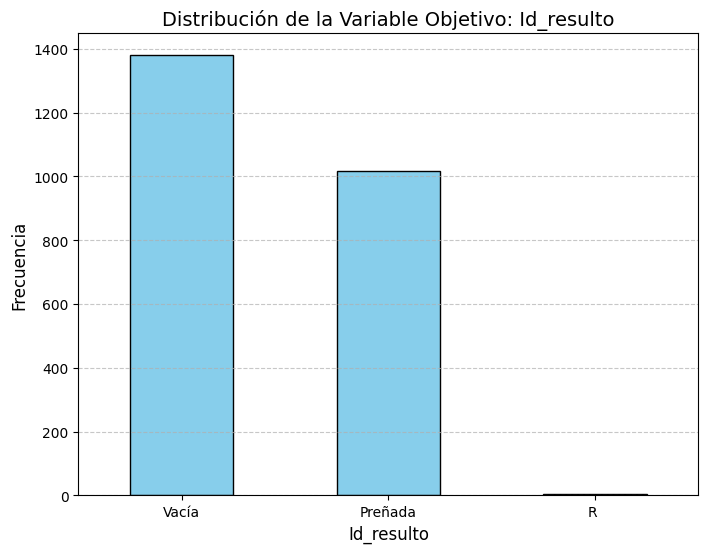

<ipython-input-28-a83f7fc75eb8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Id_resulto", y=column, data=df_cleaned, palette="pastel")


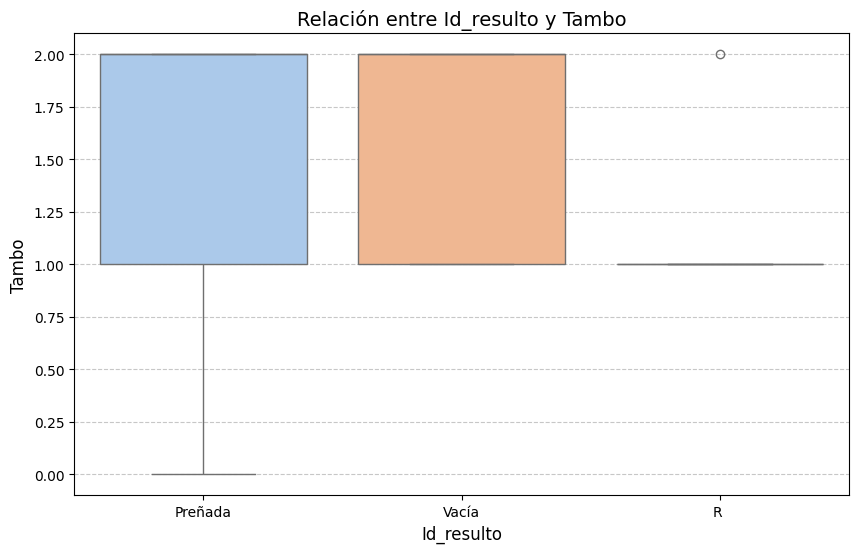

<ipython-input-28-a83f7fc75eb8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Id_resulto", y=column, data=df_cleaned, palette="pastel")


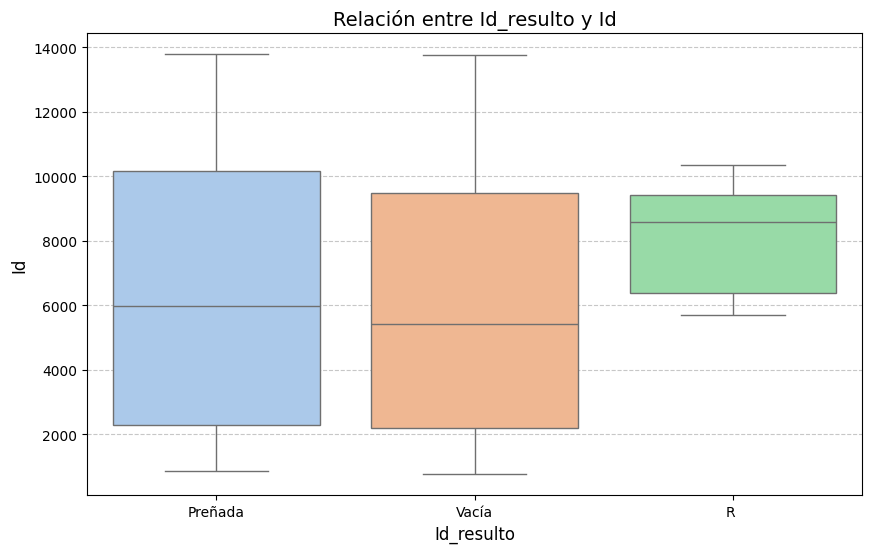

<ipython-input-28-a83f7fc75eb8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Id_resulto", y=column, data=df_cleaned, palette="pastel")


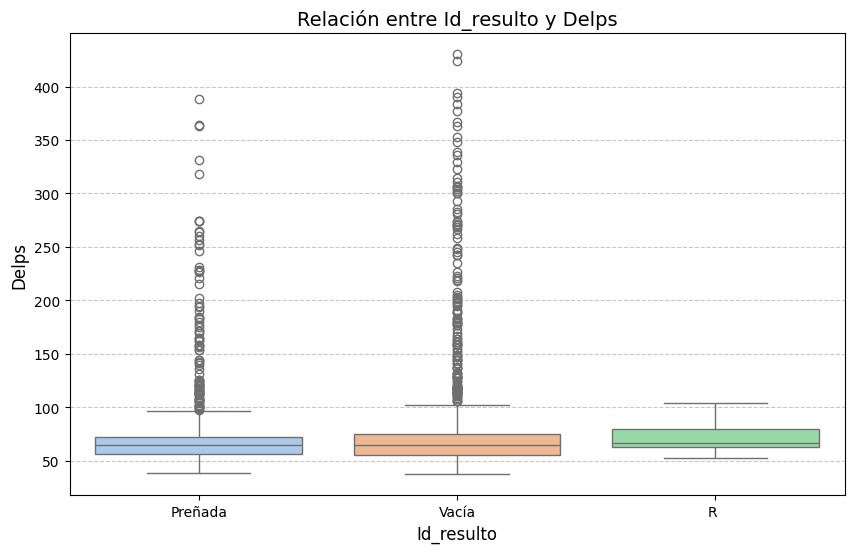

<ipython-input-28-a83f7fc75eb8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Id_resulto", y=column, data=df_cleaned, palette="pastel")


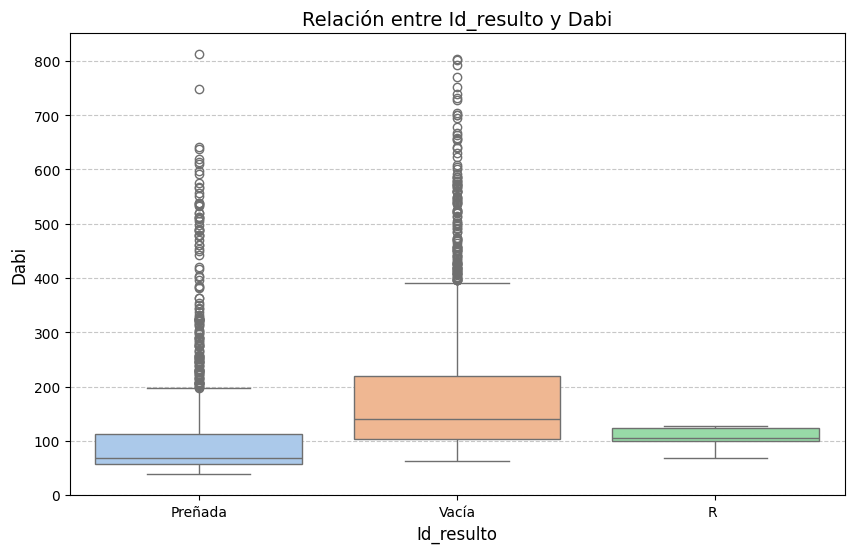

<ipython-input-28-a83f7fc75eb8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Id_resulto", y=column, data=df_cleaned, palette="pastel")


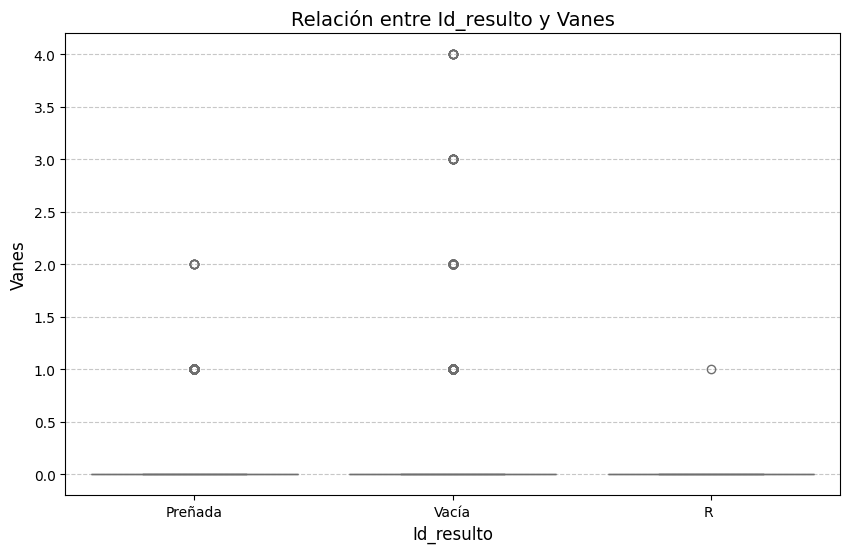

<ipython-input-28-a83f7fc75eb8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Id_resulto", y=column, data=df_cleaned, palette="pastel")


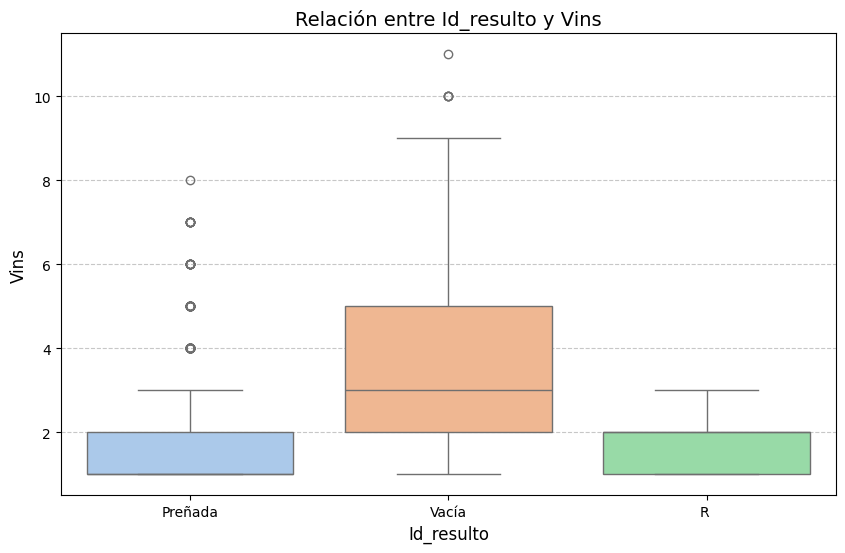

<ipython-input-28-a83f7fc75eb8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Id_resulto", y=column, data=df_cleaned, palette="pastel")


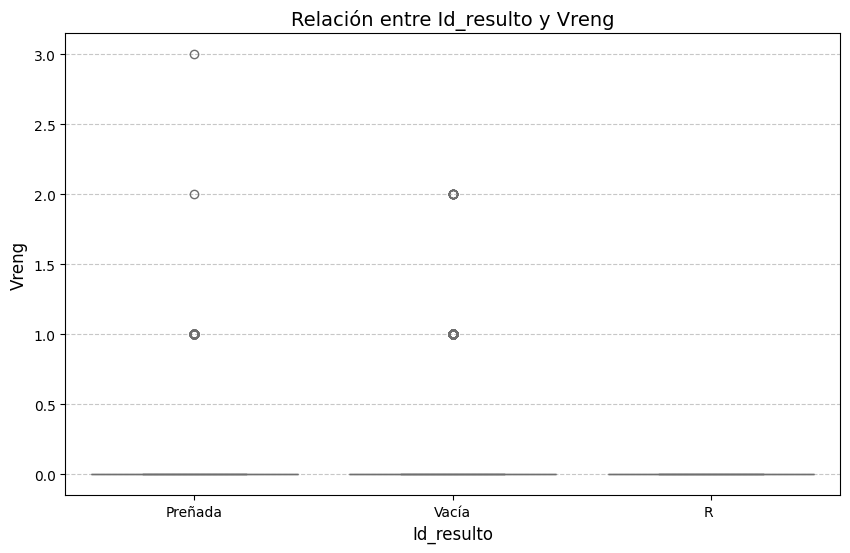

<ipython-input-28-a83f7fc75eb8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Id_resulto", y=column, data=df_cleaned, palette="pastel")


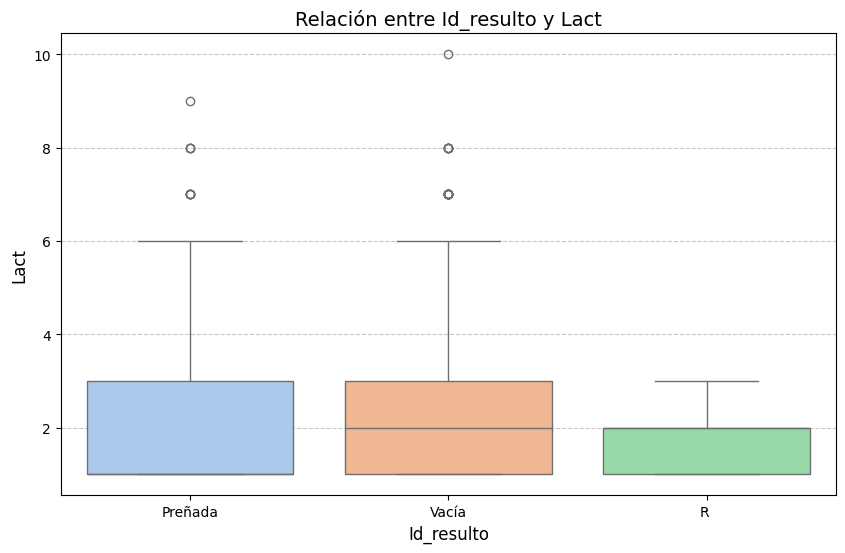

<ipython-input-28-a83f7fc75eb8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Id_resulto", y=column, data=df_cleaned, palette="pastel")


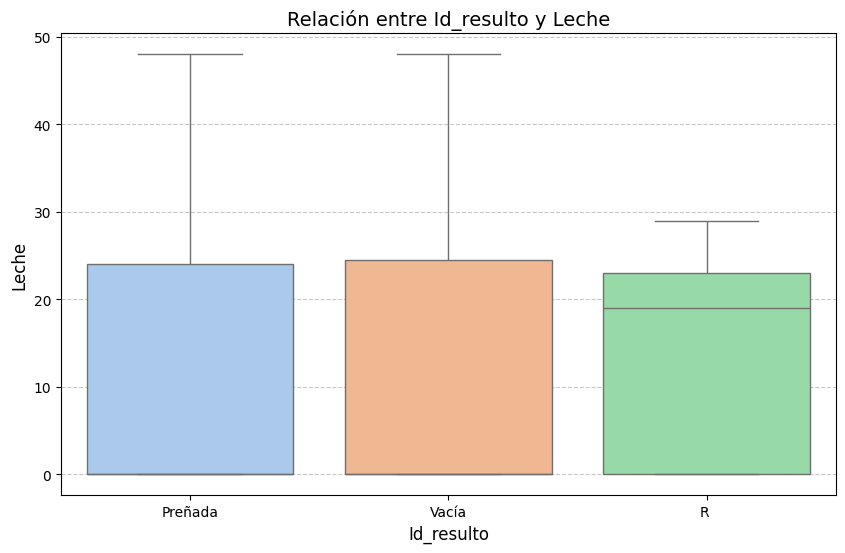

<ipython-input-28-a83f7fc75eb8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Id_resulto", y=column, data=df_cleaned, palette="pastel")


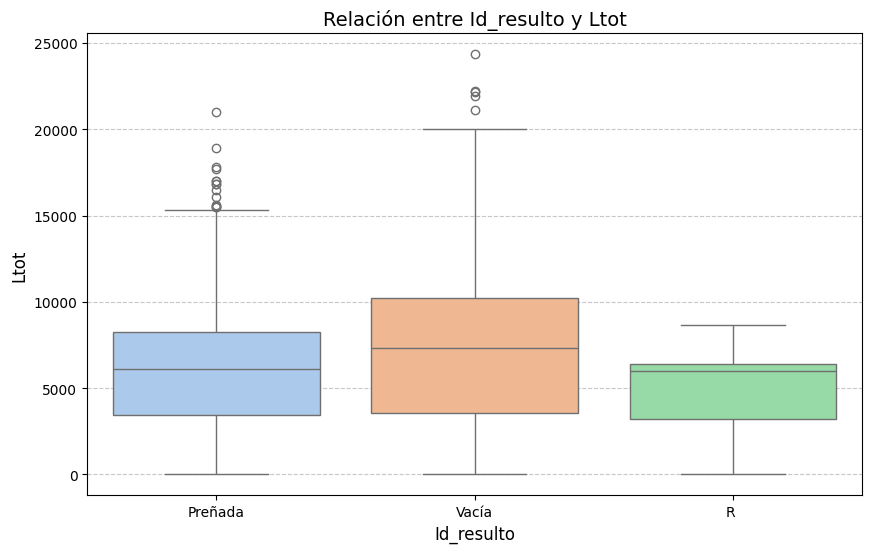

<ipython-input-28-a83f7fc75eb8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Id_resulto", y=column, data=df_cleaned, palette="pastel")


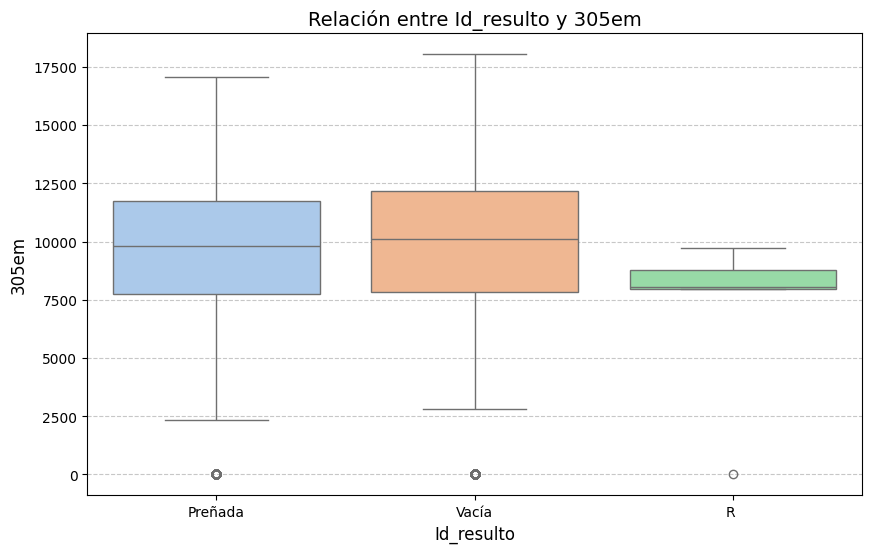

<ipython-input-28-a83f7fc75eb8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Id_resulto", y=column, data=df_cleaned, palette="pastel")


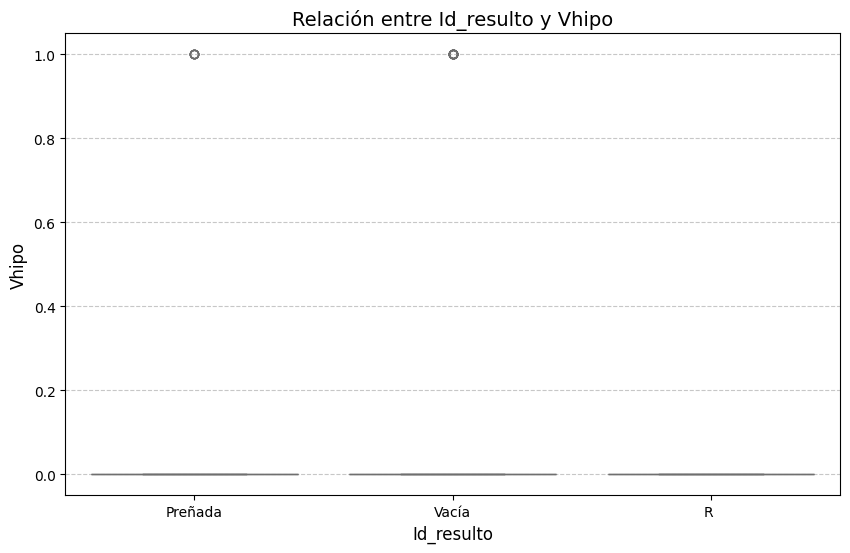

<ipython-input-28-a83f7fc75eb8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Id_resulto", y=column, data=df_cleaned, palette="pastel")


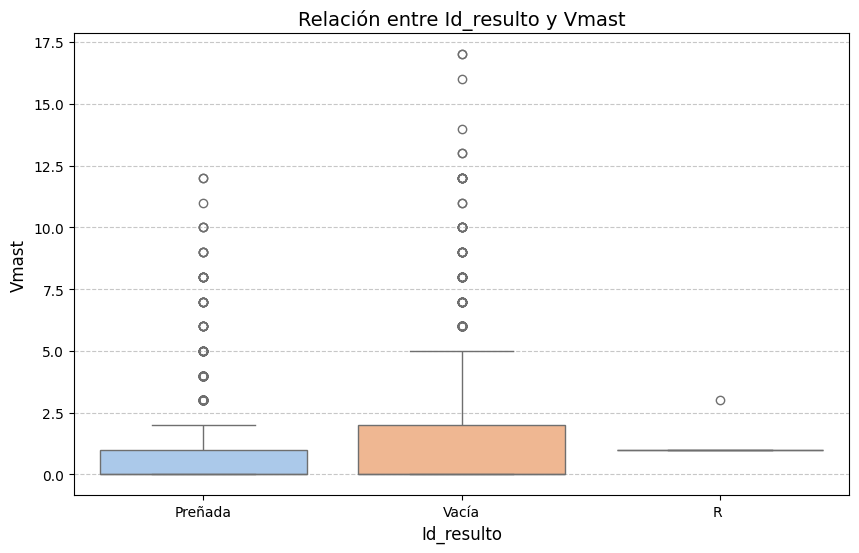

<ipython-input-28-a83f7fc75eb8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Id_resulto", y=column, data=df_cleaned, palette="pastel")


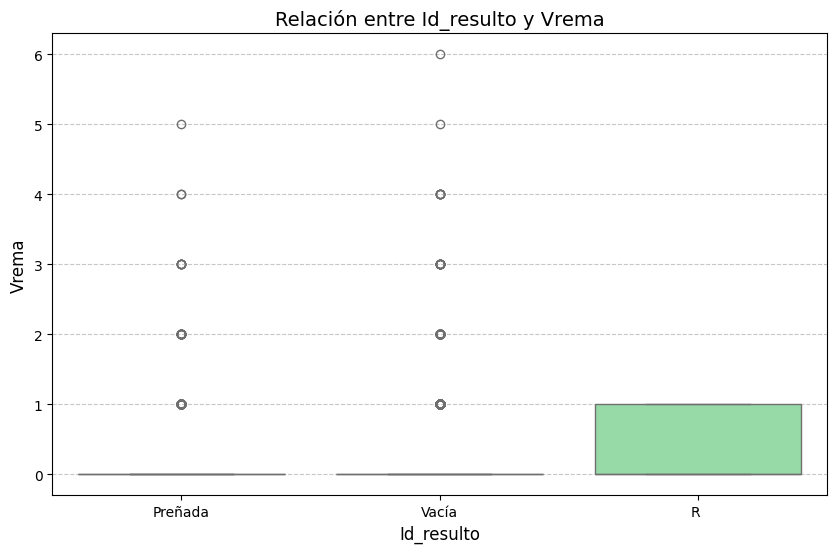

<ipython-input-28-a83f7fc75eb8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Id_resulto", y=column, data=df_cleaned, palette="pastel")


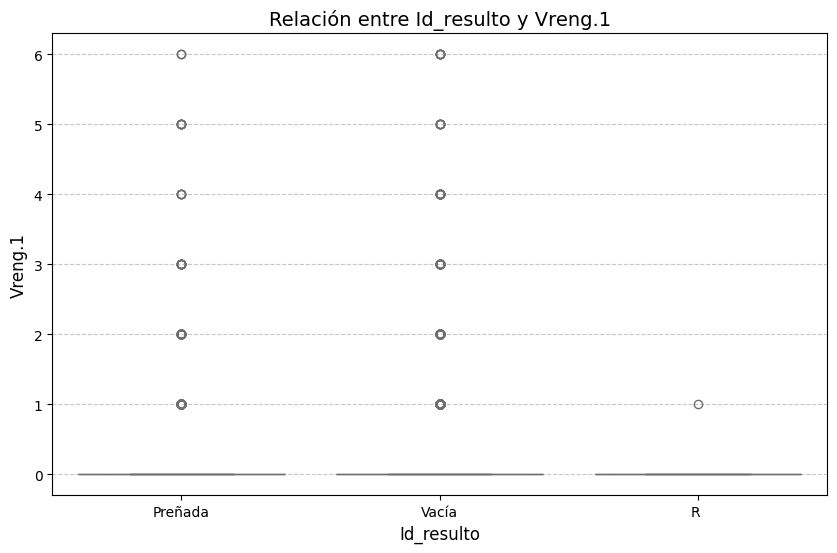

<ipython-input-28-a83f7fc75eb8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Id_resulto", y=column, data=df_cleaned, palette="pastel")


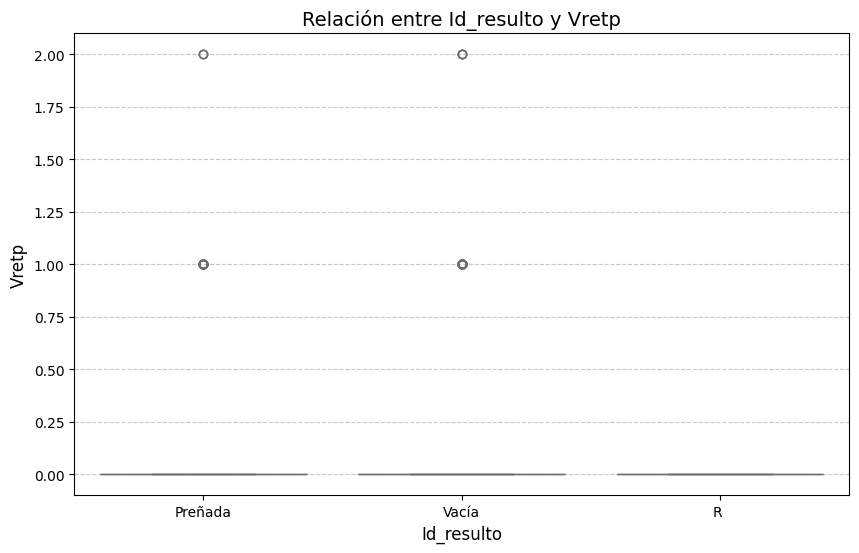

<ipython-input-28-a83f7fc75eb8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Id_resulto", y=column, data=df_cleaned, palette="pastel")


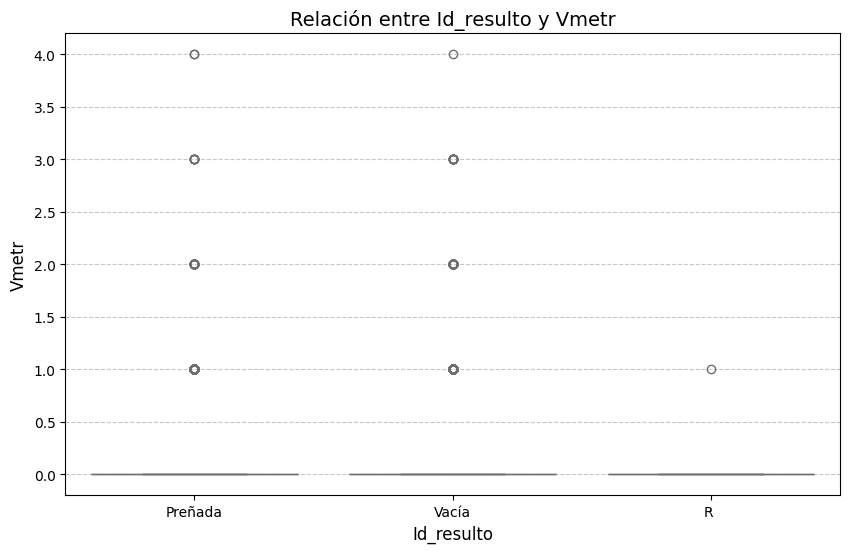

<ipython-input-28-a83f7fc75eb8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Id_resulto", y=column, data=df_cleaned, palette="pastel")


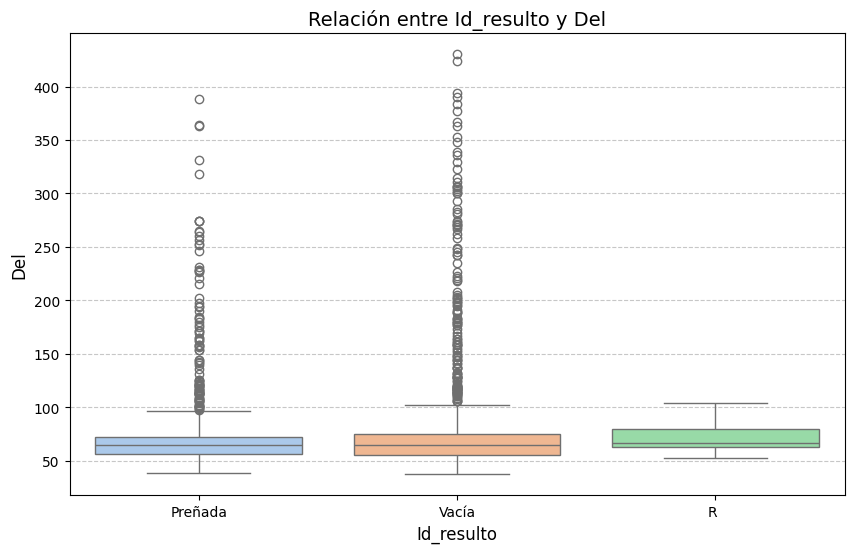

<ipython-input-28-a83f7fc75eb8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Id_resulto", y=column, data=df_cleaned, palette="pastel")


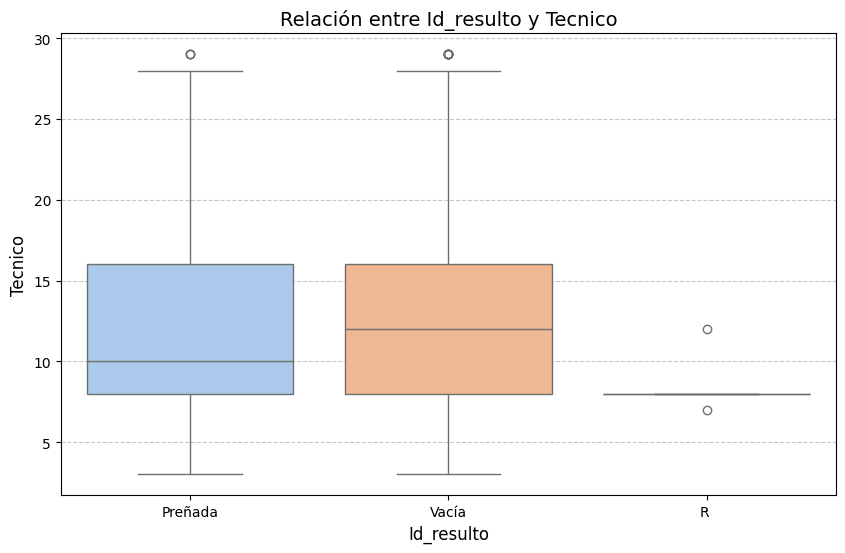

Estadísticas Descriptivas de Variables Numéricas:
             Tambo            Id        Delps         Dabi        Vanes  \
count  2401.000000   2401.000000  2401.000000  2401.000000  2401.000000   
mean      1.566847   6078.816743    75.764681   157.132028     0.226989   
std       0.496455   3727.112526    44.656103   128.242071     0.556511   
min       0.000000    757.000000    37.000000    38.000000     0.000000   
25%       1.000000   2229.000000    56.000000    70.000000     0.000000   
50%       2.000000   5677.000000    65.000000   112.000000     0.000000   
75%       2.000000   9677.000000    74.000000   190.000000     0.000000   
max       2.000000  13783.000000   430.000000   812.000000     4.000000   

              Vins        Vreng         Lact        Leche          Ltot  \
count  2401.000000  2401.000000  2401.000000  2401.000000   2401.000000   
mean      2.718867     0.146606     2.083715    11.689296   6699.645981   
std       1.890022     0.371032     1.381149    1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis Univariado: Distribución de la variable objetivo
id_resulto_counts = df_cleaned["Id_resulto"].value_counts()

# Gráfico de distribución de "Id_resulto"
plt.figure(figsize=(8, 6))
id_resulto_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de la Variable Objetivo: Id_resulto', fontsize=14)
plt.xlabel('Id_resulto', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Análisis Univariado: Estadísticas descriptivas de las variables numéricas
numeric_summary = df_cleaned.describe()

# Análisis Bivariado: Relación entre "Id_resulto" y variables numéricas
# Usaremos boxplots para visualizar las diferencias
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Generar boxplots para cada columna numérica en relación con "Id_resulto"
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Id_resulto", y=column, data=df_cleaned, palette="pastel")
    plt.title(f'Relación entre Id_resulto y {column}', fontsize=14)
    plt.xlabel('Id_resulto', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Presentar los resultados de los análisis univariados
print("Estadísticas Descriptivas de Variables Numéricas:")
print(numeric_summary)

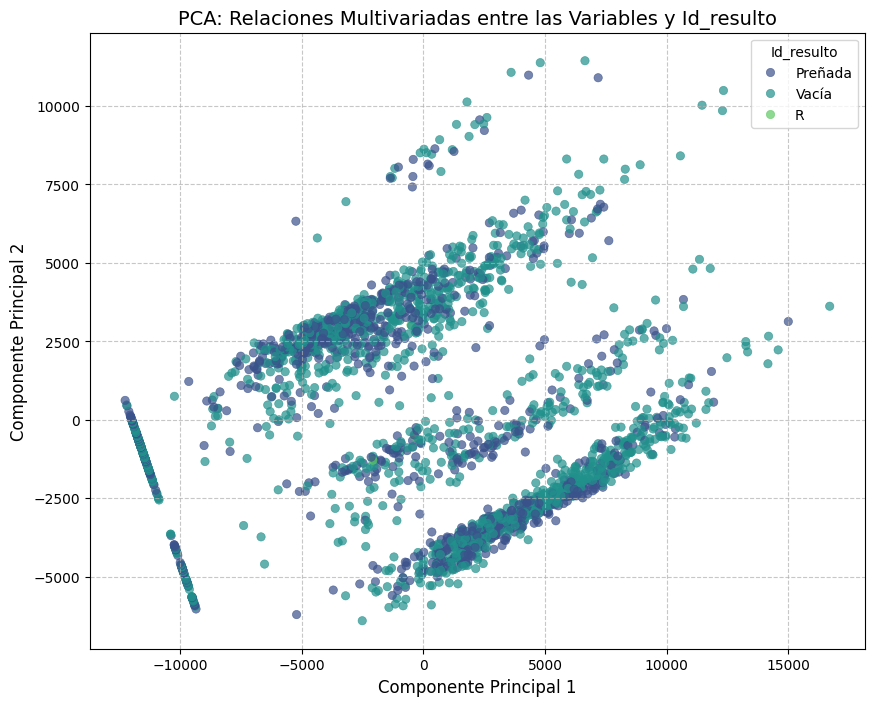

Varianza explicada por PCA1: 0.6819106100521102
Varianza explicada por PCA2: 0.22295707841372794


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna "Id_resulto" a valores numéricos para análisis multivariado
label_encoder = LabelEncoder()
df_cleaned["Id_resulto_encoded"] = label_encoder.fit_transform(df_cleaned["Id_resulto"])

# Seleccionar variables numéricas para PCA (análisis de componentes principales)
numeric_data = df_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=["Id_resulto_encoded"])

# Aplicar PCA para reducir dimensionalidad
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_data.fillna(0))  # Llenar valores nulos con 0 para evitar errores

# Agregar los componentes principales al dataframe
df_cleaned["PCA1"] = pca_result[:, 0]
df_cleaned["PCA2"] = pca_result[:, 1]

# Gráfico de PCA con las categorías de "Id_resulto"
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="PCA1", y="PCA2",
    hue="Id_resulto",
    data=df_cleaned,
    palette="viridis",
    alpha=0.7,
    edgecolor=None
)
plt.title('PCA: Relaciones Multivariadas entre las Variables y Id_resulto', fontsize=14)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(title="Id_resulto")
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# Mostrar resultados explicativos del PCA
pca_explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por PCA1:", pca_explained_variance[0])
print("Varianza explicada por PCA2:", pca_explained_variance[1])


In [ ]:
# Eliminar espacios adicionales en los valores de la columna "Id_resulto"
df_cleaned["Id_resulto"] = df_cleaned["Id_resulto"].str.strip()

# Eliminar filas con el valor "R"
df_cleaned = df_cleaned[df_cleaned["Id_resulto"] != "R"]

# Verificar los valores únicos restantes en la columna "Id_resulto"
final_id_resulto_counts_cleaned = df_cleaned["Id_resulto"].value_counts()
print(final_id_resulto_counts_cleaned)


Id_resulto
Vacía      1379
Preñada    1017
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd

# Codificar la variable objetivo (Id_resulto)
label_encoder = LabelEncoder()
df_cleaned["Id_resulto_encoded"] = label_encoder.fit_transform(df_cleaned["Id_resulto"])

# Separar las variables predictoras y la variable objetivo
X = df_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=["Id_resulto_encoded"])
y = df_cleaned["Id_resulto_encoded"]

# Escalar las variables para el análisis de chi-cuadrado
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Selección de características con chi-cuadrado
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X_scaled, y)
chi2_scores = chi2_selector.scores_

# Selección de características basada en un modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)
rf_importances = rf_model.feature_importances_

# Crear un dataframe resumen de importancia
feature_importance_df = pd.DataFrame({
    "Variable": X.columns,
    "Chi2_Score": chi2_scores,
    "RandomForest_Importance": rf_importances
}).sort_values(by="RandomForest_Importance", ascending=False)

# Mostrar los resultados
print("Importancia de las variables para predecir Id_resulto:")
print(feature_importance_df)


Importancia de las variables para predecir Id_resulto:
   Variable  Chi2_Score  RandomForest_Importance
5      Vins  143.215016                 0.377391
3      Dabi   36.153284                 0.254353
2     Delps    0.694385                 0.056489
17      Del    0.694385                 0.051646
9      Ltot    4.482046                 0.051580
1        Id    0.516303                 0.044900
10    305em    0.049922                 0.035324
8     Leche    0.700939                 0.021056
7      Lact    7.555247                 0.016419
6     Vreng   15.585707                 0.015658
12    Vmast    6.508782                 0.015428
18  Tecnico    1.815198                 0.014828
4     Vanes   17.665278                 0.012151
14  Vreng.1    7.293404                 0.010051
13    Vrema    5.041420                 0.007203
16    Vmetr    1.667569                 0.007080
0     Tambo    0.037198                 0.004714
15    Vretp    0.326258                 0.003050
11    Vhipo   

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd

# Separar datos en entrenamiento y prueba
X = df_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=["Id_resulto_encoded"])
y = df_cleaned["Id_resulto_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Lista de modelos a probar
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

# Entrenar y evaluar cada modelo
model_results = {}
for model_name, model in models.items():
    # Entrenar modelo
    model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Evaluar modelo
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    model_results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": report
    }

# Mostrar resultados
model_results_summary = pd.DataFrame({
    "Model": list(model_results.keys()),
    "Accuracy": [result["Accuracy"] for result in model_results.values()]
}).sort_values(by="Accuracy", ascending=False)

# Mostrar resumen de resultados
print("Resumen de modelos:")
print(model_results_summary)

# Para cada modelo, mostrar el reporte de clasificación detallado
for model_name, result in model_results.items():
    print(f"\nReporte de clasificación para {model_name}:\n")
    print(result["Classification Report"])


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Resumen de modelos:
                    Model  Accuracy
1           Random Forest  0.902083
0     Logistic Regression  0.847917
2  Support Vector Machine  0.575000

Reporte de clasificación para Logistic Regression:

              precision    recall  f1-score   support

     Preñada       0.80      0.85      0.83       204
       Vacía       0.89      0.84      0.86       276

    accuracy                           0.85       480
   macro avg       0.84      0.85      0.85       480
weighted avg       0.85      0.85      0.85       480


Reporte de clasificación para Random Forest:

              precision    recall  f1-score   support

     Preñada       0.94      0.82      0.88       204
       Vacía       0.88      0.96      0.92       276

    accuracy                           0.90       480
   macro avg       0.91      0.89      0.90       480
weighted avg       0.91      0.90      0.90       480


Reporte de clasificación para Support Vector Machine:

              precision   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Codificar la variable objetivo
label_encoder = LabelEncoder()
df_cleaned["Id_resulto_encoded"] = label_encoder.fit_transform(df_cleaned["Id_resulto"])

# Separar variables predictoras y objetivo
X = df_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=["Id_resulto_encoded"])
y = df_cleaned["Id_resulto_encoded"]

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Imputar valores faltantes con la mediana
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Generar predicciones y reporte de clasificación
y_pred_rf = rf_model.predict(X_test)
rf_classification_report = classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_)

# Mostrar el reporte de clasificación
print("Reporte de Clasificación para Random Forest:")
print(rf_classification_report)


Reporte de Clasificación para Random Forest:
              precision    recall  f1-score   support

     Preñada       0.94      0.82      0.88       204
       Vacía       0.88      0.96      0.92       276

    accuracy                           0.90       480
   macro avg       0.91      0.89      0.90       480
weighted avg       0.91      0.90      0.90       480



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /mnt/data/random_forest_model.pkl /content/drive/MyDrive/random_forest_model.pkl


cp: cannot stat '/mnt/data/random_forest_model.pkl': No such file or directory
